#### Author：马肖
#### E-Mail：maxiaoscut@aliyun.com
#### GitHub：https://github.com/Albertsr

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")


class Truncated_SVD:
    def __init__(self, data, n_components):
        self.data = data
        self.n_components = n_components
        self.shape = data.shape
        
    def SvdResult(self):
        height, width, channels = self.shape[0], self.shape[1], self.shape[2]
    
        planes = []
        for idx in range(channels):
            plane = self.data[:, :, idx]
   
            # 转成二维矩阵
            plane = np.reshape(plane, (height, width))
    
            svd = TruncatedSVD(n_components=self.n_components)
    
            # 拟合数据，进行矩阵分解，生成特征空间，剔去无关紧要的成分
            svd.fit(plane)
            
            # 将输入数据转换到特征空间
            new_plane = svd.transform(plane)
            
            # 再将特征空间的数据转换会数据空间
            plane = svd.inverse_transform(new_plane)
            plane = np.clip(plane, 0, 1)
            
            # 存起来
            planes.append(plane)
            
        img_ = np.dstack(planes) 
        plt.imshow(img_)
        plt.show()    

Shape (575, 863, 4)


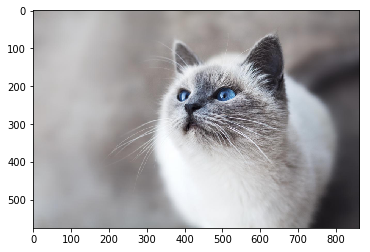

In [2]:
pic = 'https://imgsa.baidu.com/baike/pic/item/00e93901213fb80e2f604bc43dd12f2eb938946b.jpg'
img_array = img.imread(pic)
print('Shape', img_array.shape)
plt.imshow(img_array)
plt.show()

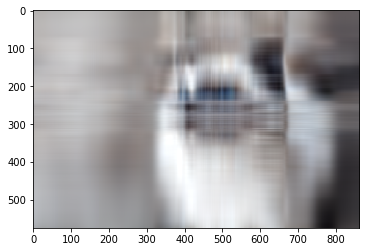

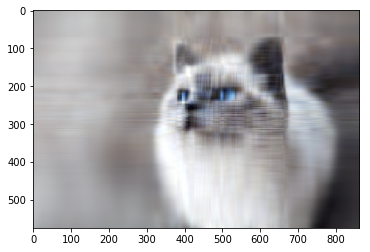

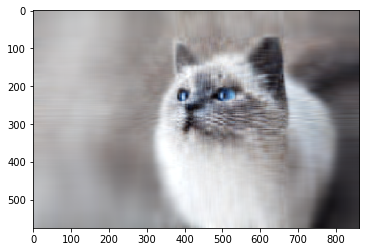

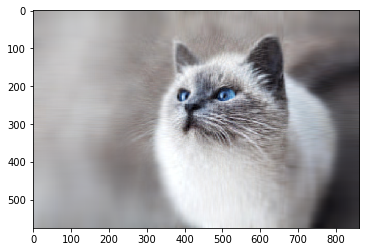

(None, None, None, None)

In [3]:
SVD_5 = Truncated_SVD(img_array, 5).SvdResult()
SVD_10 = Truncated_SVD(img_array, 10).SvdResult()
SVD_15 = Truncated_SVD(img_array, 15).SvdResult()
SVD_30 = Truncated_SVD(img_array, 30).SvdResult()

SVD_5, SVD_10, SVD_15, SVD_30